<a href="https://colab.research.google.com/github/sanjay-hds5210/ORES_Assignment/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HDS 5210-2023 FINAL PROJECT**

This research explores the connections between sleep cycles, exercise regimens, and drug use, including alcohol and caffeine. The goal is to extract significant insights from carefully selected health datasets by utilizing the capabilities of Python programming and visualization tools like Matplotlib and Seaborn.

The project's primary focus is on lifestyle-related factors that have been shown to affect cardiovascular health.  I want  to reveal subtle relationships and patterns that have practical consequences for both individuals and healthcare professionals by closely examining sleep duration, exercise routines, and substance use. My methodology goes beyond traditional data analysis; my goal is to deliver actionable insight that can inform tailored healthcare plans and add to the conversation on cardiovascular health.

This comprehensive investigation highlights the role that age, gender, and general lifestyle choices play in determining cardiovascular outcomes. Through this project, I hope to close the knowledge gap between data exploration and practical application, enabling people to make heart-healthy decisions.

# **DATA SOURCES**

**Data source 1**:  https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

 Firstly, I am importing the essential libraries like matplotlib, seaborn, and pandas for data analysis and visualization. Then after loading a dataset called “heart.xlsx” into a pandas dataframe. There is a function developed to look for missing values in the dataset after a few rows and the DataFrame's summary statistics are viewed. Counts of missing values and percentages for each column are sorted and printed out as a result.  The ‘heart Data’ dataset is examined by the codes. The first histogram shows the distribution of ages and differentiates between "More chance of heart attack" and "Less chance of heart attack." Further modifications improve comprehensibility by translating numerical gender values and redesignating the 'sex' column as 'gender.' Differences in cholesterol levels between risk groups are shown by box and violin plots, while correlation matrix heatmaps shed light on feature correlations.  

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
def missingValueCheck(data):
  '''
  This function will print the missing values

  '''
  missingValues = data.isnull().sum()
  print(missingValues)


In [77]:
heartData = pd.read_excel("heart.xlsx")

heartData.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [78]:
missingValueCheck(heartData)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [79]:
heartData.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [80]:
heartData['sex'] = heartData['sex'].replace({1: 'Female', 0: 'Male'})

heartData.rename(columns={'sex': 'gender'}, inplace=True)

heartData

age  gender  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  \
0     63  Female   3     145   233    1        0       150     0      2.3   
1     37  Female   2     130   250    0        1       187     0      3.5   
2     41    Male   1     130   204    0        0       172     0      1.4   
3     56  Female   1     120   236    0        1       178     0      0.8   
4     57    Male   0     120   354    0        1       163     1      0.6   
..   ...     ...  ..     ...   ...  ...      ...       ...   ...      ...   
298   57    Male   0     140   241    0        1       123     1      0.2   
299   45  Female   3     110   264    0        1       132     0      1.2   
300   68  Female   0     144   193    1        1       141     0      3.4   
301   57  Female   0     130   131    0        1       115     1      1.2   
302   57    Male   1     130   236    0        0       174     0      0.0   

     slp  caa  thall  output  
0      0    0      1       1  
1      0    0      2       1  
2      2    0      2       1  
3      2    0      2       1  
4      2    0      2       1  
..   ...  ...    ...     ...  
298    1    0      3       0  
299    1    0      3       0  
300    1    2      3       0  
301    1    1      3       0  
302    1    1      2       0  

[303 rows x 14 columns]

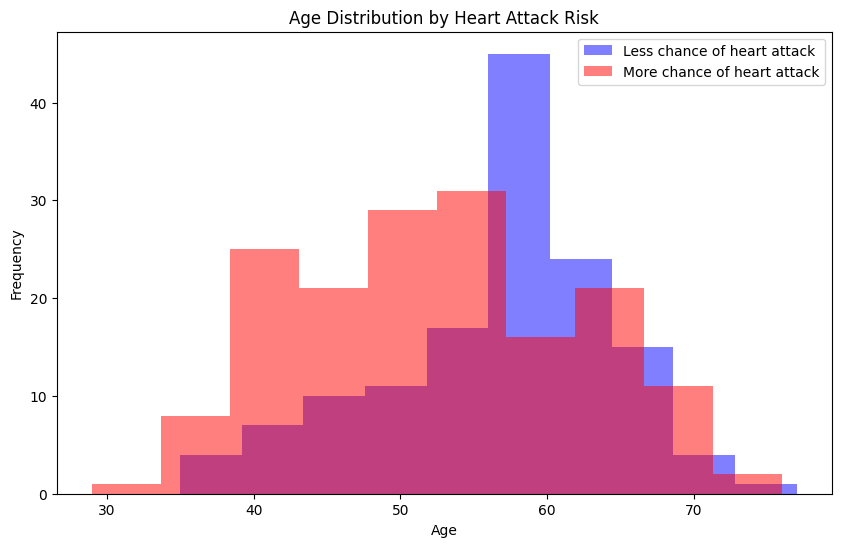

In [8]:
#create a histogram
plt.figure(figsize=(10, 6))
plt.hist(heartData[heartData['output'] == 0]['age'], bins=10, alpha=0.5, label='Less chance of heart attack', color='blue')
plt.hist(heartData[heartData['output'] == 1]['age'], bins=10, alpha=0.5, label='More chance of heart attack', color='red')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Heart Attack Risk')
plt.legend()
plt.show()

<ipython-input-10-f18a20cab9c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = heartData.corr()


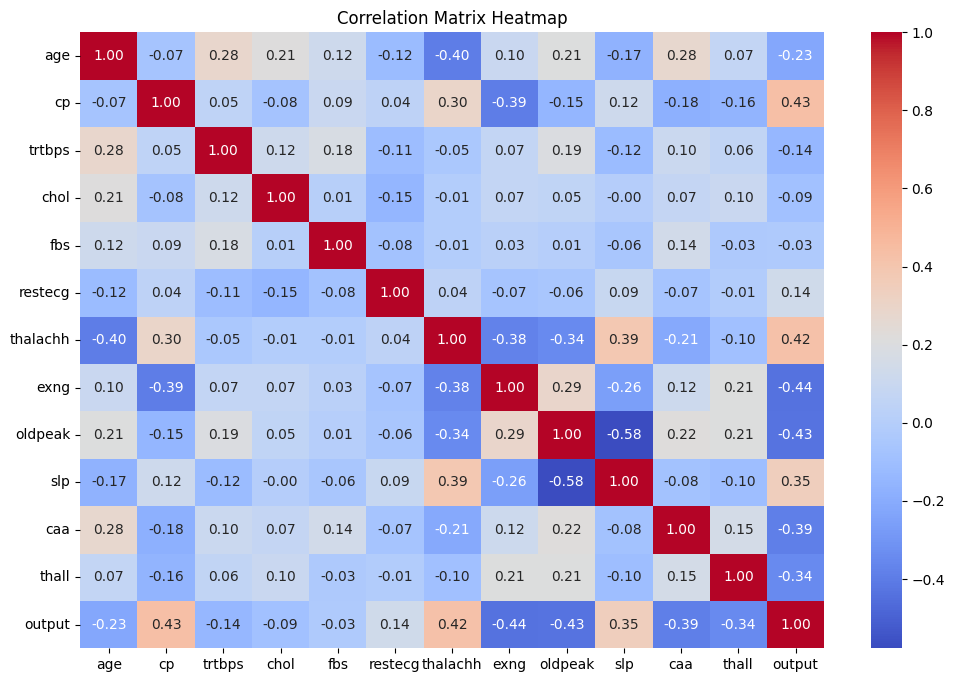

In [10]:
#create a correlation matrix heatmap
correlation_matrix = heartData.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

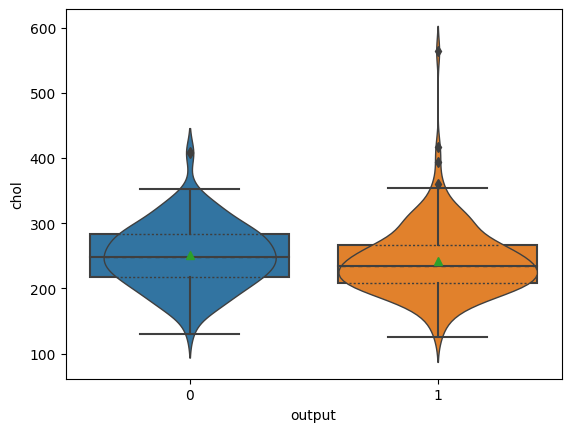

In [11]:
#create a boxplot & violinplot
sns.boxplot(
    x="output",
    y="chol",
    showmeans=True,
    data=heartData,
)
sns.violinplot(
    x="output",
    y="chol",
    showmeans=True,
    inner="quart",
    linewidth=1,
    data=heartData,
)
plt.show()

**Data source2**:  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Same as the above after loading this dataset ‘healthcare-dataset-stroke-data.csv’ by using pandas, I gave a function to find missing values , to drop the aforementioned column and to obtain the statistics by using function called describe(). In this dataset, the first line of code creates a count plot that compares the incidence of strokes among people according to their marital status. In a similar manner, the second code compares marital status with different forms of work, providing information about how different employment categories are distributed among married and single people. A scatterplot illustrating the correlation between age and BMI is generated by the third code. The points are coloured according to gender and sized according to the frequency of strokes. The fourth function provides a visual depiction of the direction and degree of correlations between numerical variables in this dataset by computing and displaying a correlation matrix heatmap.

In [61]:
healh_care = pd.read_csv("healthcare-dataset-stroke-data.csv")
healh_care

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi  stroke  
0           Private          Urban             228.69  36.6       1  
1     Self-employed          Rural             202.21   NaN       1  
2           Private          Rural             105.92  32.5       1  
3           Private          Urban             171.23  34.4       1  
4     Self-employed          Rural             174.12  24.0       1  
...             ...            ...                ...   ...     ...  
5105        Private          Urban              83.75   NaN       0  
5106  Self-employed          Urban             125.20  40.0       0  
5107  Self-employed          Rural              82.99  30.6       0  
5108        Private          Rural             166.29  25.6       0  
5109       Govt_job          Urban              85.28  26.2       0  

[5110 rows x 11 columns]

In [62]:
healh_care = healh_care.drop(['id'], axis=1)

missingValueCheck(healh_care)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64


In [63]:
# we will drop all the columns with bmi as NA if the count is less we would have either replaced with 0 or with mean of the data.
health_care_updated = healh_care.dropna(subset=['bmi'])

health_care_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 421.9+ KB


In [64]:
# prompt: Using dataframe health_care_updated:

health_care_updated.describe()


age  hypertension  heart_disease  avg_glucose_level  \
count  4909.000000   4909.000000    4909.000000        4909.000000   
mean     42.865374      0.091872       0.049501         105.305150   
std      22.555115      0.288875       0.216934          44.424341   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.070000   
50%      44.000000      0.000000       0.000000          91.680000   
75%      60.000000      0.000000       0.000000         113.570000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  4909.000000  
mean     28.893237     0.042575  
std       7.854067     0.201917  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

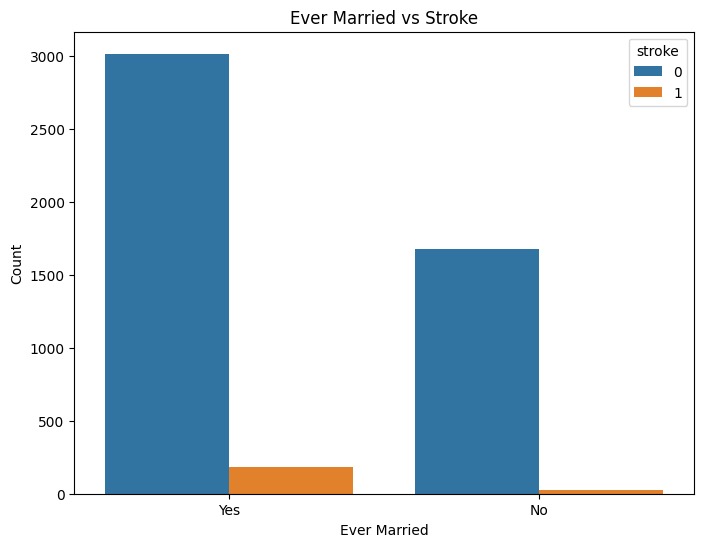

In [16]:
#create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married', hue='stroke', data=health_care_updated)
plt.title('Ever Married vs Stroke')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.show()

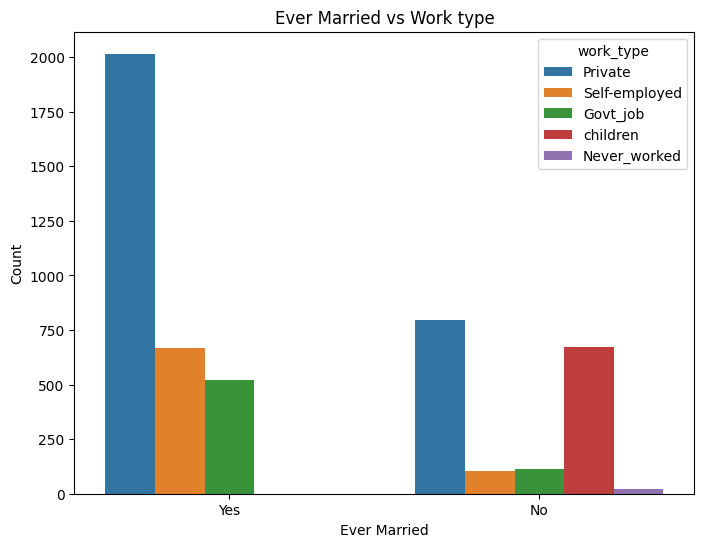

In [17]:
#create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married', hue='work_type', data=health_care_updated)
plt.title('Ever Married vs Work type')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.show()

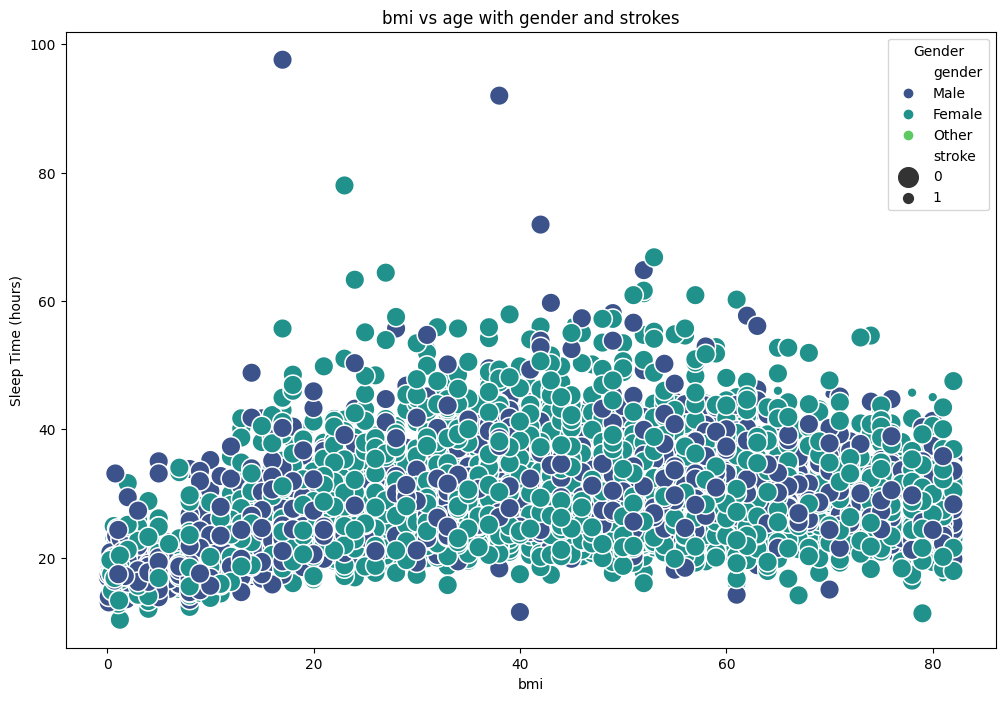

In [18]:
#create a scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='bmi', hue='gender', size='stroke', data=health_care_updated, palette='viridis', sizes=(50, 200))
plt.title('bmi vs age with gender and strokes')
plt.xlabel('bmi')
plt.ylabel('Sleep Time (hours)')
plt.legend(title='Gender')
plt.show()

<ipython-input-19-2b8f85428cca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = health_care_updated.corr()


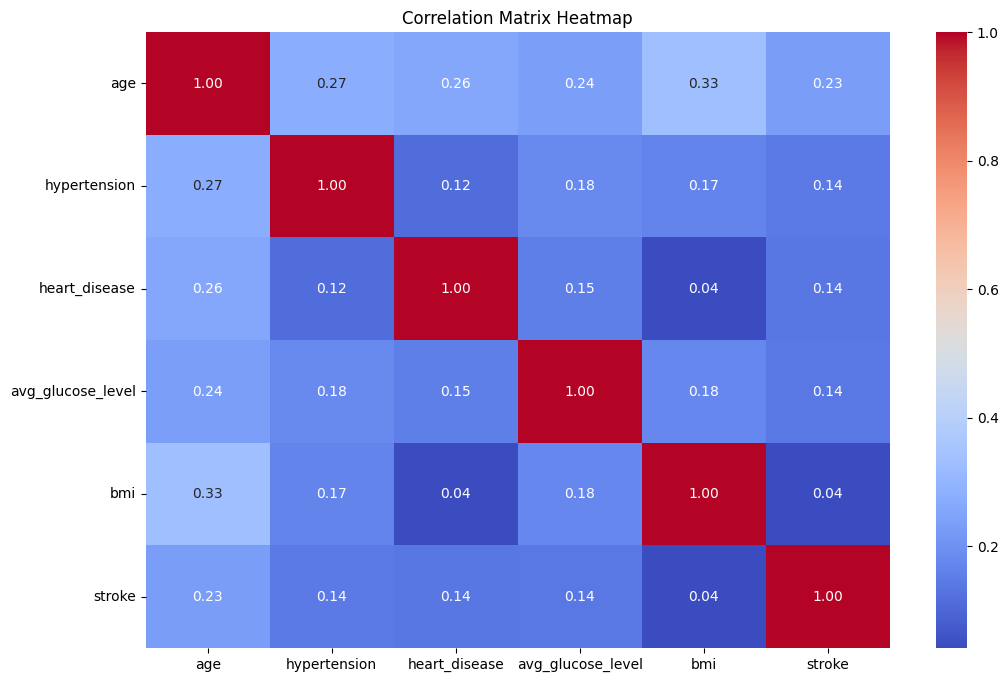

In [19]:
#create a correlation heatmap
correlation_matrix = health_care_updated.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Data source 3**: https://www.jsonblob.com/1184773045952045056


Since I needed to use this dataset for my undergrad thesis to create a report on how important sleep is to a healthy lifestyle, I actually took it from my local file and converted the CSV to JSON format for my convenience.I have taken this dataset from my local file Similarly for loading the dataset ‘json_blob_link’, I used pandas and assigned to the variable called ‘sleep’. To identify the missing values, I used the function called missingValueCheck and describe() function was used to show the statistical value. In the first code segment, the rows in the sleep dataset that have missing values for the important variables "awakenings," "caffeine consumption," "alcohol consumption," and "exercise frequency" are removed. The second code snippet uses the cleaned dataset to create a scatterplot that shows the link between age and sleep duration after the data has been cleaned. The third code examines the effect of coffee consumption on sleep efficiency in the sleep dataset through the use of a boxplot. The fourth code investigates gender-based differences in sleep efficiency using an additional boxplot. By correcting missing values and offering visual insights into the correlations between age, coffee use, sleep efficiency, and duration of sleep, these codes collectively help to enhance the dataset and highlight the role of gender in determining sleep outcomes.

In [20]:
json_blob_link = "https://jsonblob.com/api/1184773045952045056"
sleep = pd.read_json(json_blob_link)
sleep

ID  Age  Gender              Bedtime          Wakeup time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
0               6.0              0.88                    18   
1               7.0              0.66                    19   
2               8.0              0.89                    20   
3               6.0              0.51                    23   
4               8.0              0.76                    27   
..              ...               ...                   ...   
447             7.5              0.91                    22   
448             6.0              0.74                    28   
449             8.5              0.55                    20   
450             7.0              0.76                    18   
451             7.5              0.63                    22   

     Deep sleep percentage  Light sleep percentage  Awakenings  \
0                       70                      12         0.0   
1                       28                      53         3.0   
2                       70                      10         1.0   
3                       25                      52         3.0   
4                       55                      18         3.0   
..                     ...                     ...         ...   
447                     57                      21         0.0   
448                     57                      15         4.0   
449                     32                      48         1.0   
450                     72                      10         3.0   
451                     23                      55         1.0   

     Caffeine consumption  Alcohol consumption Smoking status  \
0                     0.0                  0.0            Yes   
1                     0.0                  3.0            Yes   
2                     0.0                  0.0             No   
3                    50.0                  5.0            Yes   
4                     0.0                  3.0             No   
..                    ...                  ...            ...   
447                   0.0                  0.0             No   
448                  25.0                  0.0             No   
449                   NaN                  3.0            Yes   
450                   0.0                  0.0             No   
451                  50.0                  0.0             No   

     Exercise frequency  
0                   3.0  
1                   3.0  
2                   3.0  
3                   1.0  
4                   3.0  
..                  ...  
447                 5.0  
448                 3.0  
449                 0.0  
450                 3.0  
451                 1.0  

[452 rows x 15 columns]

In [21]:
sleep.columns = sleep.columns.str.lower()

In [22]:
missingValueCheck(sleep)

id                         0
age                        0
gender                     0
bedtime                    0
wakeup time                0
sleep duration             0
sleep efficiency           0
rem sleep percentage       0
deep sleep percentage      0
light sleep percentage     0
awakenings                20
caffeine consumption      25
alcohol consumption       14
smoking status             0
exercise frequency         6
dtype: int64


In [23]:
sleep = sleep.dropna(subset=['awakenings'])
sleep = sleep.dropna(subset=['caffeine consumption'])
sleep = sleep.dropna(subset=['alcohol consumption'])
sleep = sleep.dropna(subset=['exercise frequency'])

In [24]:
sleep.describe()

id         age  sleep duration  sleep efficiency  \
count  388.000000  388.000000      388.000000        388.000000   
mean   226.260309   40.829897        7.451031          0.789253   
std    129.578114   13.403187        0.883483          0.135706   
min      1.000000    9.000000        5.000000          0.500000   
25%    111.750000   29.000000        7.000000          0.700000   
50%    228.500000   41.000000        7.500000          0.820000   
75%    339.250000   52.000000        8.000000          0.900000   
max    452.000000   69.000000       10.000000          0.990000   

       rem sleep percentage  deep sleep percentage  light sleep percentage  \
count            388.000000             388.000000              388.000000   
mean              22.680412              52.822165               24.497423   
std                3.430510              15.571518               15.309638   
min               15.000000              18.000000                7.000000   
25%               20.000000              51.000000               15.000000   
50%               22.000000              58.000000               18.000000   
75%               25.000000              63.000000               24.000000   
max               30.000000              75.000000               63.000000   

       awakenings  caffeine consumption  alcohol consumption  \
count  388.000000            388.000000           388.000000   
mean     1.618557             22.680412             1.146907   
std      1.355958             28.997566             1.612793   
min      0.000000              0.000000             0.000000   
25%      1.000000              0.000000             0.000000   
50%      1.000000              0.000000             0.000000   
75%      3.000000             50.000000             2.000000   
max      4.000000            200.000000             5.000000   

       exercise frequency  
count          388.000000  
mean             1.757732  
std              1.447824  
min              0.000000  
25%              0.000000  
50%              2.000000  
75%              3.000000  
max              5.000000

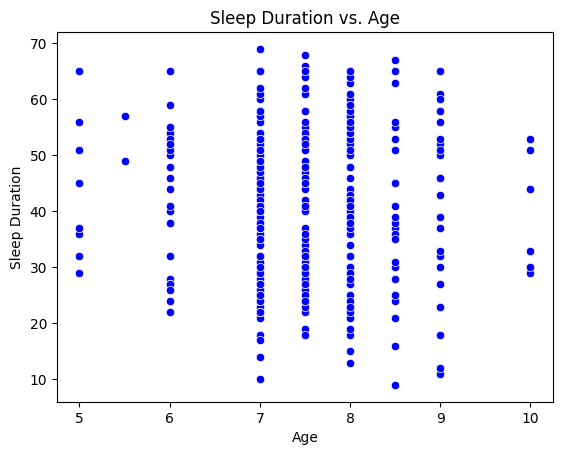

In [25]:
#create a scatterplot
sns.scatterplot(x='sleep duration', y='age', data=sleep, color='blue')
plt.title('Sleep Duration vs. Age')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()


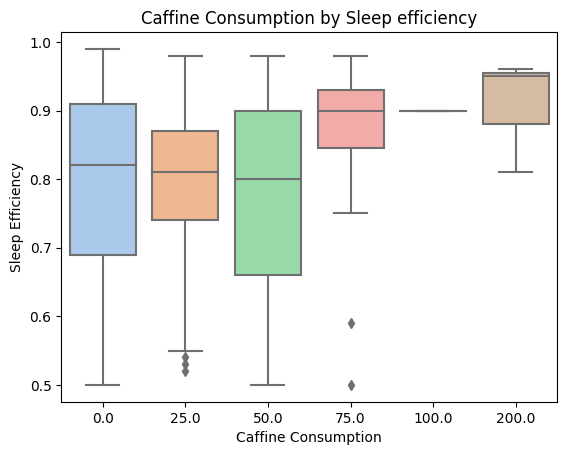

In [26]:
#create a boxplot
sns.boxplot(x='caffeine consumption', y='sleep efficiency', data=sleep, palette='pastel')
plt.title('Caffine Consumption by Sleep efficiency')
plt.xlabel('Caffine Consumption')
plt.ylabel('Sleep Efficiency')
plt.show()

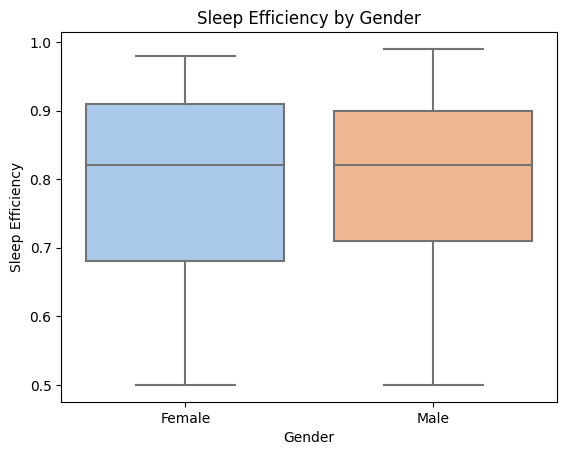

In [27]:
#create a boxplot
sns.boxplot(x='gender', y='sleep efficiency', data=sleep, palette='pastel')
plt.title('Sleep Efficiency by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Efficiency')
plt.show()



# MERGING DATASETS

 The given code uses the Python environment to perform a series of data merges and exploratory visualizations. The combination of 'heartData' and 'health_care' on the 'age' column serves as an example of how to combine datasets using the custom function merge Datasets. In the 'heartData,''sleep,' and 'health_care_updated,' further merges investigate the associations between different health-related variables using inner joins on 'age' and 'gender.' Two examples of visualizations include a count plot that evaluates the distribution of heart disease based on smoking status and a boxplot that shows the relationship between the incidence of stroke and sleep efficiency. After a final merge that combines 'heartData' and 'sleep' based on 'age' and 'gender,' the resulting 'merged_sleep' DataFrame presents a thorough summary of health-related data.

In [85]:
def mergeDatasets(dataFrame1, dataFrame2, joinColumn):
    '''
    This function Merges two pandas DataFrames on a specified column.
    '''
    mergedData = pd.merge(dataFrame1, dataFrame2, on=joinColumn)
    return mergedData


In [29]:
merged = mergeDatasets(heartData, healh_care, "age")

merged.head()

<ipython-input-28-0344084ff492>:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  mergedData = pd.merge(dataFrame1, dataFrame2, on=joinColumn)


age gender_x  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  ...  \
0   63   Female   3     145   233    1        0       150     0      2.3  ...   
1   63   Female   3     145   233    1        0       150     0      2.3  ...   
2   63   Female   3     145   233    1        0       150     0      2.3  ...   
3   63   Female   3     145   233    1        0       150     0      2.3  ...   
4   63   Female   3     145   233    1        0       150     0      2.3  ...   

   output  gender_y  hypertension  heart_disease ever_married  work_type  \
0       1    Female             0              0          Yes    Private   
1       1    Female             0              0          Yes   Govt_job   
2       1      Male             0              1          Yes    Private   
3       1      Male             0              0          Yes    Private   
4       1      Male             0              0          Yes    Private   

   Residence_type avg_glucose_level   bmi stroke  
0           Urban             90.90   NaN      1  
1           Urban            197.54   NaN      1  
2           Rural            196.71  36.5      1  
3           Rural            228.56  27.4      1  
4           Rural            137.30  31.7      1  

[5 rows x 23 columns]

In [30]:
mergedData = pd.merge(sleep, heartData , on=['gender', 'age'], how='inner')
merged_data = pd.merge(mergedData, health_care_updated, left_on=['gender', 'age'], right_on=['gender', 'age'], how='inner')
merged_data

<ipython-input-30-bf5193305bb0>:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data = pd.merge(mergedData, health_care_updated, left_on=['gender', 'age'], right_on=['gender', 'age'], how='inner')


id  age  gender              bedtime          wakeup time  \
0        1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1        1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
2        1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
3        1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
4        1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
...    ...  ...     ...                  ...                  ...   
34381  437   59    Male  2021-06-10 21:30:00  2021-06-10 05:30:00   
34382  437   59    Male  2021-06-10 21:30:00  2021-06-10 05:30:00   
34383  437   59    Male  2021-06-10 21:30:00  2021-06-10 05:30:00   
34384  437   59    Male  2021-06-10 21:30:00  2021-06-10 05:30:00   
34385  437   59    Male  2021-06-10 21:30:00  2021-06-10 05:30:00   

       sleep duration  sleep efficiency  rem sleep percentage  \
0                 6.0              0.88                    18   
1                 6.0              0.88                    18   
2                 6.0              0.88                    18   
3                 6.0              0.88                    18   
4                 6.0              0.88                    18   
...               ...               ...                   ...   
34381             8.0              0.72                    27   
34382             8.0              0.72                    27   
34383             8.0              0.72                    27   
34384             8.0              0.72                    27   
34385             8.0              0.72                    27   

       deep sleep percentage  light sleep percentage  ...  thall  output  \
0                         70                      12  ...      3       1   
1                         70                      12  ...      3       1   
2                         70                      12  ...      3       1   
3                         70                      12  ...      3       1   
4                         70                      12  ...      3       1   
...                      ...                     ...  ...    ...     ...   
34381                     55                      18  ...      2       0   
34382                     55                      18  ...      2       0   
34383                     55                      18  ...      2       0   
34384                     55                      18  ...      2       0   
34385                     55                      18  ...      2       0   

       hypertension heart_disease  ever_married      work_type  \
0                 0             0           Yes        Private   
1                 0             0           Yes        Private   
2                 1             0           Yes        Private   
3                 0             0           Yes  Self-employed   
4                 0             1           Yes        Private   
...             ...           ...           ...            ...   
34381             0             0           Yes        Private   
34382             0             0           Yes        Private   
34383             0             0           Yes        Private   
34384             0             0           Yes        Private   
34385             1             0           Yes        Private   

       Residence_type  avg_glucose_level   bmi  stroke  
0               Rural             100.98  28.2       1  
1               Urban             205.77  46.0       1  
2               Rural              75.70  41.8       0  
3               Rural             104.21  36.8       0  
4               Rural             196.36  34.5       0  
...               ...                ...   ...     ...  
34381           Urban             135.84  27.3       0  
34382           Rural              69.37  26.9       0  
34383           Urban              66.46  39.6       0  
34384           Urban              81.21  33.2       0  
34385           Rural              95.05  30.9       0  

[34386 

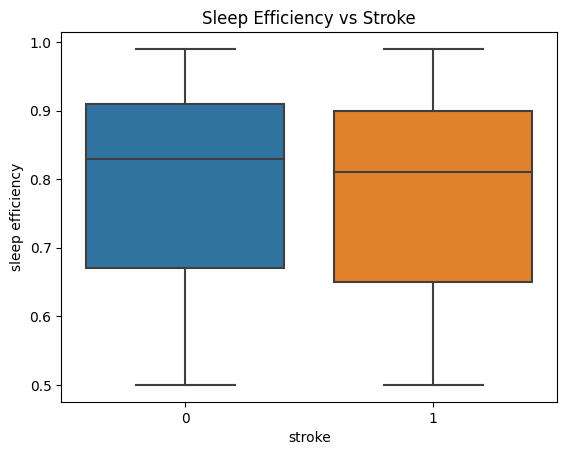

In [31]:
#create a boxplot
sns.boxplot(x='stroke', y='sleep efficiency', data=merged_data)
plt.title('Sleep Efficiency vs Stroke')
plt.show()

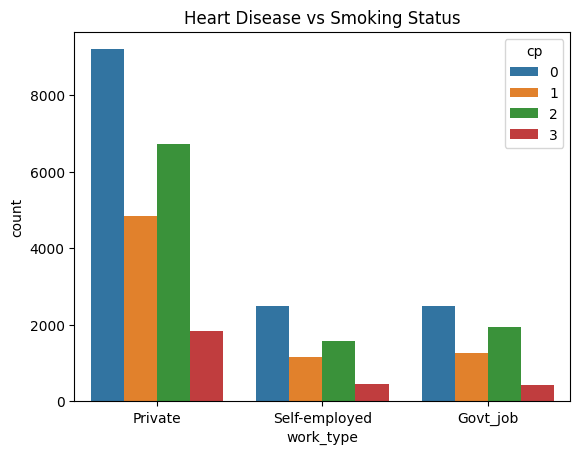

In [32]:
#create a countplot
sns.countplot(x='work_type', hue='cp', data=merged_data)
plt.title('Heart Disease vs Smoking Status')
plt.show()

In [33]:
merged_sleep = pd.merge(heartData, sleep, on = ["age", "gender"])

merged_sleep

age  gender  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  \
0     63  Female   3     145   233    1        0       150     0      2.3   
1     63  Female   3     145   233    1        0       150     0      2.3   
2     63  Female   0     130   254    0        0       147     0      1.4   
3     63  Female   0     130   254    0        0       147     0      1.4   
4     63  Female   0     130   330    1        0       132     1      1.8   
..   ...     ...  ..     ...   ...  ...      ...       ...   ...      ...   
911   61    Male   0     145   307    0        0       146     1      1.0   
912   61    Male   0     145   307    0        0       146     1      1.0   
913   61    Male   0     145   307    0        0       146     1      1.0   
914   61    Male   0     145   307    0        0       146     1      1.0   
915   59    Male   0     174   249    0        1       143     1      0.0   

     ...  sleep duration  sleep efficiency  rem sleep percentage  \
0    ...             8.0              0.98                    22   
1    ...             8.5              0.69                    22   
2    ...             8.0              0.98                    22   
3    ...             8.5              0.69                    22   
4    ...             8.0              0.98                    22   
..   ...             ...               ...                   ...   
911  ...             7.0              0.73                    22   
912  ...             9.0              0.77                    20   
913  ...             7.0              0.86                    23   
914  ...             7.0              0.94                    27   
915  ...             8.0              0.72                    27   

     deep sleep percentage  light sleep percentage awakenings  \
0                       65                      13        0.0   
1                       24                      54        3.0   
2                       65                      13        0.0   
3                       24                      54        3.0   
4                       65                      13        0.0   
..                     ...                     ...        ...   
911                     57                      21        3.0   
912                     70                      10        1.0   
913                     60                      17        0.0   
914                     55                      18        1.0   
915                     55                      18        2.0   

    caffeine consumption  alcohol consumption  smoking status  \
0                   50.0                  0.0              No   
1                   50.0                  0.0              No   
2                   50.0                  0.0              No   
3                   50.0                  0.0              No   
4                   50.0                  0.0              No   
..                   ...                  ...             ...   
911                  0.0                  4.0              No   
912                  0.0                  0.0             Yes   
913                  0.0                  0.0              No   
914                  0.0                  3.0              No   
915                  0.0                  3.0              No   

     exercise frequency  
0                   1.0  
1                   0.0  
2                   1.0  
3                   0.0  
4                   1.0  
..                  ...  
911                 0.0  
912                 3.0  
913                 0.0  
914                 3.0  
915                 3.0  

[916 rows x 27 columns]

In [34]:
merged_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     916 non-null    int64  
 1   gender                  916 non-null    object 
 2   cp                      916 non-null    int64  
 3   trtbps                  916 non-null    int64  
 4   chol                    916 non-null    int64  
 5   fbs                     916 non-null    int64  
 6   restecg                 916 non-null    int64  
 7   thalachh                916 non-null    int64  
 8   exng                    916 non-null    int64  
 9   oldpeak                 916 non-null    float64
 10  slp                     916 non-null    int64  
 11  caa                     916 non-null    int64  
 12  thall                   916 non-null    int64  
 13  output                  916 non-null    int64  
 14  id                      916 non-null    in

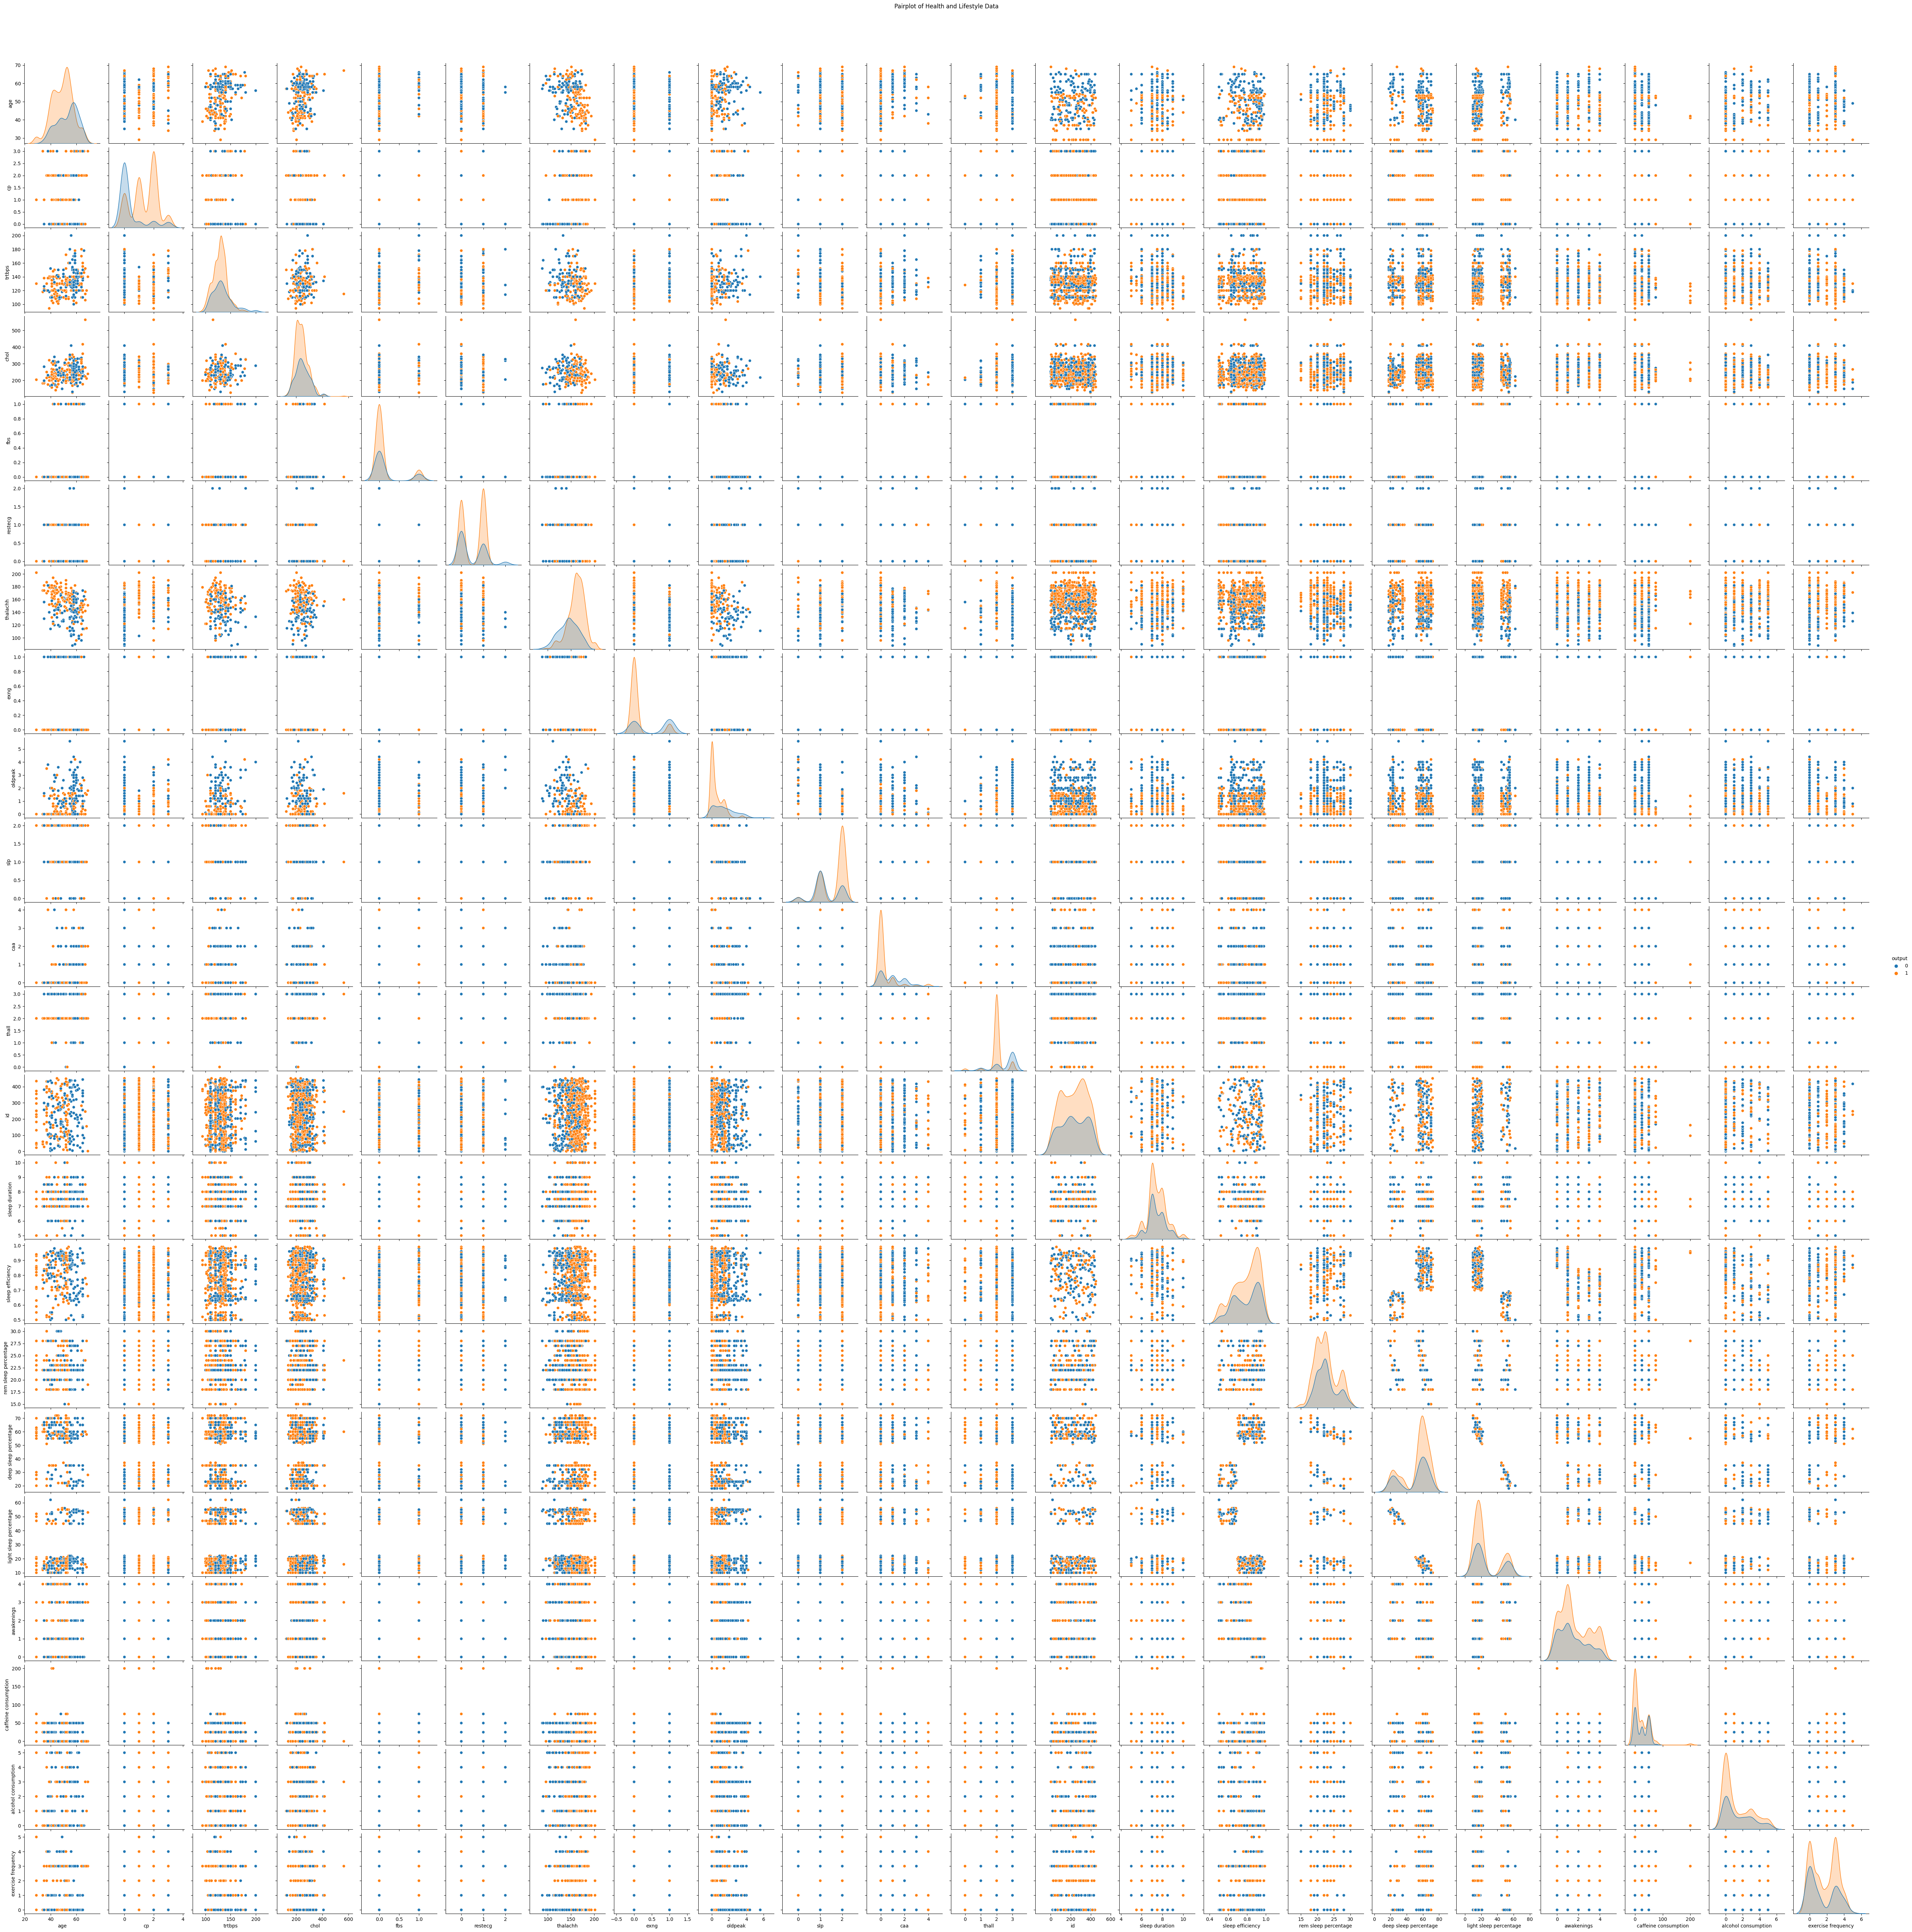

In [35]:
#create a pairplot
sns.pairplot(merged_sleep, hue='output', diag_kind='kde')
plt.suptitle('Pairplot of Health and Lifestyle Data', y=1.02)
plt.show()

# DATA AGGREGATION

The function column Aggregater is defined in the code. It aggregates statistics for a given set of columns in a DataFrame, including mean, median, min, max, and standard deviation, and displays the results in a bar plot. This is applied to the'merged1' DataFrame, providing information on combined data pertaining to average blood sugar, BMI, and length of sleep. The 'health_care_updated' DataFrame is grouped by age, and the following code computes the sum of selected variables to create a line plot that shows health changes with age.

In [87]:
def columnAggregater(dataframe, columns):
    '''
    This function Aggregates statistics for columns in a DataFrame, including mean, median, min, max, and standard deviation.
    '''
    aggregatedData = dataframe[columns].agg(['mean', 'median', 'min', 'max', 'std']).transpose()
    return aggregatedData


In [43]:
agg1 = columnAggregater(merged_data, ['sleep duration', 'bmi', "avg_glucose_level"])
agg1

mean  median    min     max        std
sleep duration       7.433243   7.000   5.00   10.00   0.899299
bmi                 31.521823  30.100  14.20   71.90   7.535936
avg_glucose_level  107.735226  93.205  55.22  271.74  45.705943

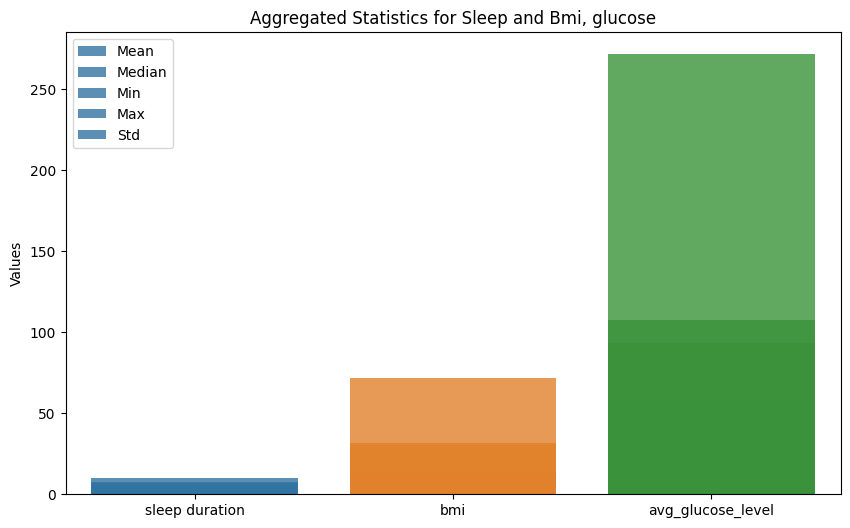

In [44]:
#create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=agg1.index, y='mean', data=agg1, label='Mean', alpha=0.8)
sns.barplot(x=agg1.index, y='median', data=agg1, label='Median', alpha=0.8)
sns.barplot(x=agg1.index, y='min', data=agg1, label='Min', alpha=0.8)
sns.barplot(x=agg1.index, y='max', data=agg1, label='Max', alpha=0.8)
sns.barplot(x=agg1.index, y='std', data=agg1, label='Std', alpha=0.8)

plt.title('Aggregated Statistics for Sleep and Bmi, glucose')
plt.ylabel('Values')
plt.legend()
plt.show()

In [45]:
agg2 = health_care_updated.groupby(['age']).sum()
agg2

<ipython-input-45-2c03d92dc2e7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg2 = health_care_updated.groupby(['age']).sum()


hypertension  heart_disease  avg_glucose_level     bmi  stroke
age                                                                  
0.08              0              0             210.00    31.0       0
0.16              0              0             294.02    44.3       0
0.24              0              0             470.56    87.0       0
0.32              0              0             455.02    90.4       0
0.40              0              0             195.21    31.7       0
...             ...            ...                ...     ...     ...
78.00            20             17           10876.83  2597.4      16
79.00            14             16            8657.05  2145.4      13
80.00            20             17            8104.83  1928.5      16
81.00            16             13            7030.81  1677.1      14
82.00            12             14            7084.56  1541.6       9

[104 rows x 5 columns]

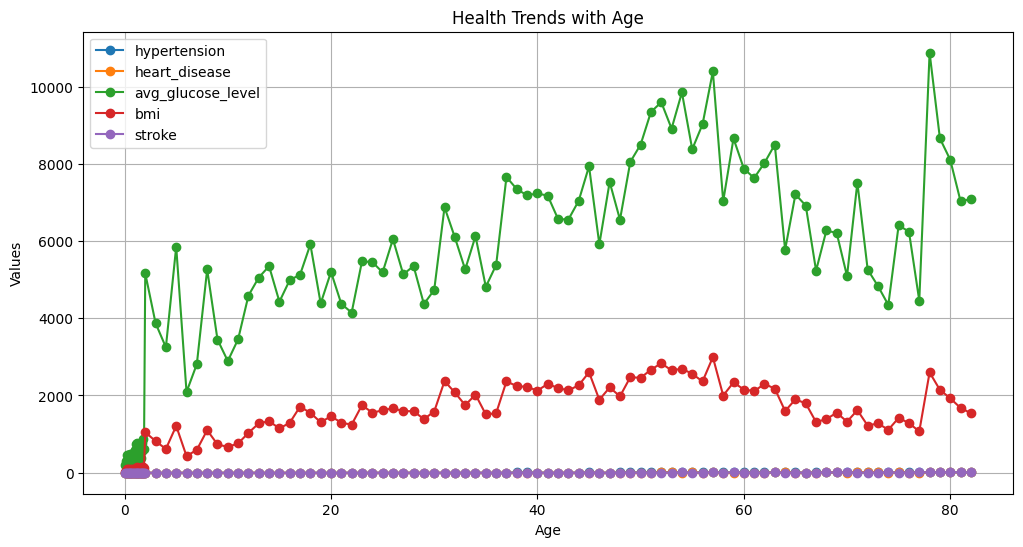

In [46]:
agg2.plot(y=['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke'], kind='line', marker='o', figsize=(12, 6))

plt.title('Health Trends with Age')
plt.xlabel('Age')
plt.ylabel('Values')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

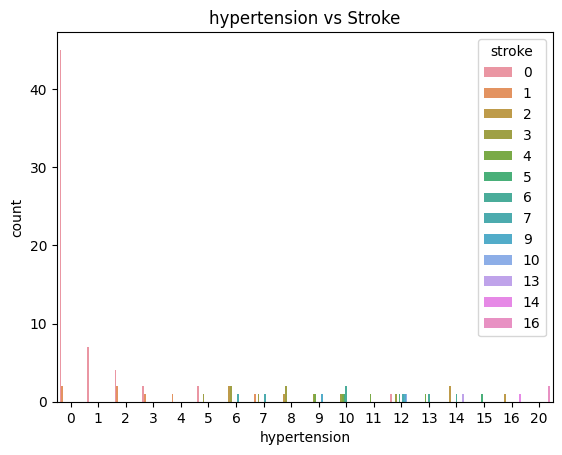

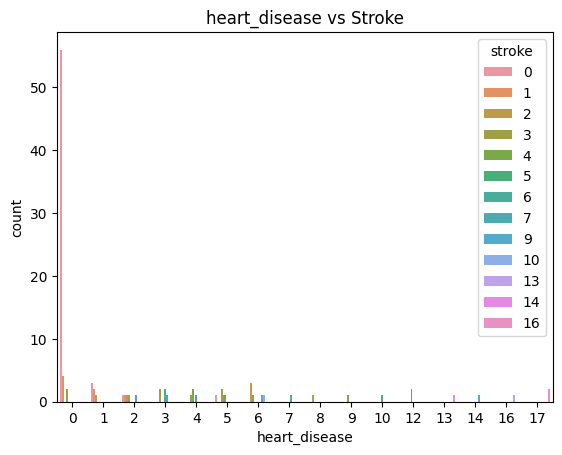

In [47]:
categorical_variables = ['hypertension', 'heart_disease']
for variable in categorical_variables:
    sns.countplot(x=variable, hue='stroke', data=agg2)
    plt.title(f'{variable} vs Stroke')
    plt.show()

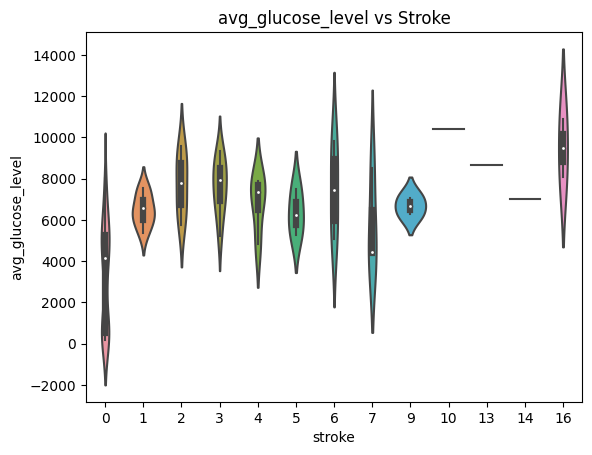

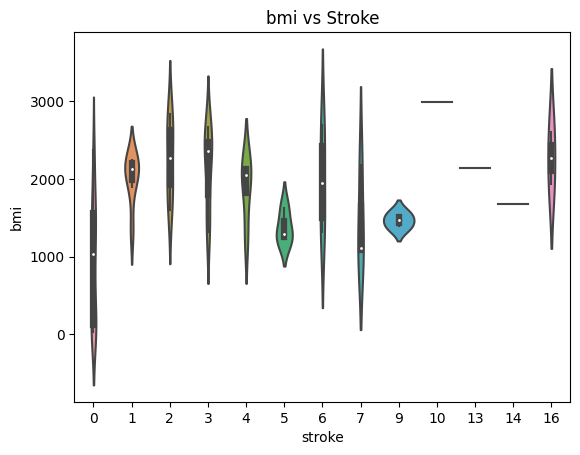

In [48]:
continuous_variables = ['avg_glucose_level', 'bmi']
for variable in continuous_variables:
    sns.violinplot(x='stroke', y=variable, data=agg2)
    plt.title(f'{variable} vs Stroke')
    plt.show()

**Correlation Matrix:**

 The code determines the correlation matrix for the combined health-related variables in the age-grouped dataset, revealing the pairwise associations between these variables. The ensuing seaborn heatmap provides a clear and understandable summary of the interactions between health indicators by graphically illustrating these relationships.

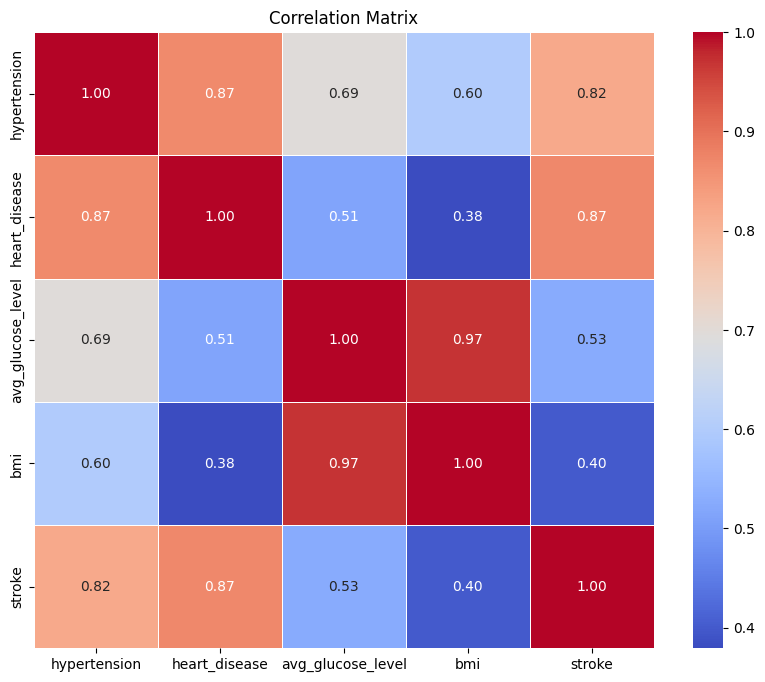

In [49]:
correlation_matrix = agg2.corr()

# Create a correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **CONCLUSION**

In conclusion, my project has used a methodical methodology that includes data loading, cleaning, merging, and visualization to conduct a complete study of three different health-related datasets: "heartData," "health_care," and "sleep." The study has revealed complex insights about cardiovascular health, stroke incidence, and sleep patterns by utilizing a range of statistical and visual methods. The merging of datasets based on common variables has facilitated a examination of health factors, while the aggregation of data has provided a consolidated view of key health indicators.One of the best aspects of the analysis is the correlation matrix heatmap, which has made complex correlations between health variables easier to see. Healthcare practitioners can benefit from this thorough investigation's insightful advice on making well-informed decisions and creating focused interventions, in addition to its improvement of our comprehension of health dynamics. For healthcare professionals looking for a more nuanced knowledge of the interactions between different health factors, this project's methods and findings are generally quite useful. This could lead to better patient outcomes and more effective healthcare practices.